Accuracy del modelo: 76.22%
Accuracy promedio con validación cruzada: 81.04%


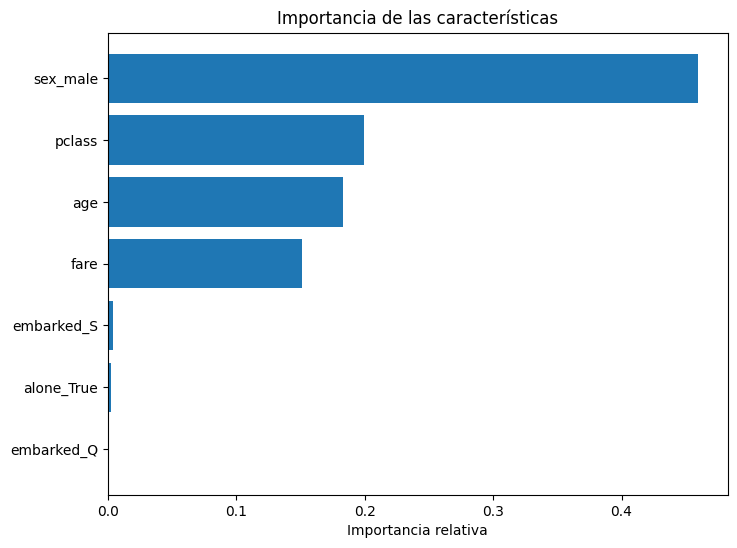

['modelo_titanic.joblib']

In [1]:
import seaborn as sns
import joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Cargar el dataset titanic de seaborn
data = sns.load_dataset('titanic') #Preprocesamiento: remover filas con valores nulos y convertir categorías en números
data = data.dropna(subset=['age', 'fare', 'embarked','sex', 'class','alone', 'survived'])
X = data[['pclass', 'sex', 'age', 'fare', 'embarked', 'alone']].copy()
y = data['survived']

#Convertir variables categóricas a numéricas usando One-Hot Encoding
X = pd.get_dummies(X, columns = ['sex', 'embarked', 'alone'], drop_first = True)

#Escalar las características numéricas (age y fare)
scaler = StandardScaler()
X[['age', 'fare']] = scaler.fit_transform(X[['age', 'fare']])

#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Entrenar el modelo Gradient Boosting Classifier con ajustes de hiperparámetros
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
model.fit(X_train, y_train)

#Evaluar el modelo en los datos de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy*100:.2f}%')

#Validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f'Accuracy promedio con validación cruzada: {scores.mean()*100:.2f}%')

#Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Importancia de las características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

#Guardar el modelo con joblib
joblib.dump(model, 'modelo_titanic.joblib')

In [2]:
print(X.columns)

Index(['pclass', 'age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S',
       'alone_True'],
      dtype='object')
